# Equity Premium Puzzle
### Based on Benartzi&Thaler(1995)

In [172]:
# packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns

In [3]:
# import the data

data = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)
data = data.iloc[:-1]
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
print(data.head())
#we split the data
text_index = 1160
datamonth = data.iloc[:text_index,:].copy()
datayear= data.iloc[text_index:,:]


# formatting the data
datamonth['Date'] = pd.to_datetime(datamonth['Unnamed: 0'], format ='%Y%m')
datamonth.set_index(datamonth['Date'], inplace=True)


#analysis on year data to obtain the same graph as in Mehra&Prescott (1985)
datayear = datayear.drop(index=[1160,1161])
datayear
datayear['Date'] = pd.to_datetime(datayear['Unnamed: 0'], format ='  %Y')
datayear.set_index(datayear['Date'].dt.year, inplace=True)
datayear=datayear.drop(columns = ["Unnamed: 0","Date"])
datayear = datayear.applymap(float)

#here he calculate the returns of stocks
datayear["Mkt"]=datayear["Mkt-RF"]+datayear["RF"]
datayear



  Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.56     -2.43      0.22
1     192608      2.64     -1.17      3.82      0.25
2     192609      0.36     -1.40      0.13      0.23
3     192610     -3.24     -0.09      0.70      0.32
4     192611      2.53     -0.10     -0.51      0.31


,Mkt-RF,SMB,HML,RF,Mkt
Date,,,,,
1927,29.47,-2.04,-4.54,3.12,32.59
1928,35.39,4.51,-6.17,3.56,38.95
1929,-19.54,-30.70,11.67,4.75,-14.79
1930,-31.23,-5.17,-11.54,2.41,-28.82
1931,-45.11,3.70,-13.95,1.07,-44.04
...,...,...,...,...,...
2018,-6.95,-3.21,-9.73,1.83,-5.12
2019,28.28,-6.11,-10.34,2.15,30.43
2020,23.66,13.18,-46.56,0.45,24.11


### Mehra&Prescott(1985)
Here we give a graphical representation of the equity premium puzzle as in Mehra&Prescott(1985)

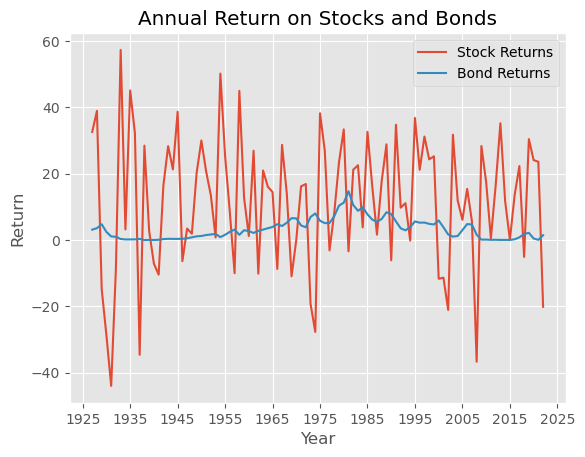

In [7]:
#graph for annual returns
datayear["Mkt"].plot(label="Stock Returns")
datayear["RF"].plot(label="Bond Returns")
xtick_positions = np.arange(1925, 2035, 10)
xtick_labels = [str(year) for year in range(1925, 2035, 10)]
plt.xticks(xtick_positions, xtick_labels)
plt.xlabel("Year")
plt.ylabel("Return")
plt.title("Annual Return on Stocks and Bonds")
plt.legend()
plt.style.use("ggplot")
plt.savefig('returns.png')

2.080557006633949


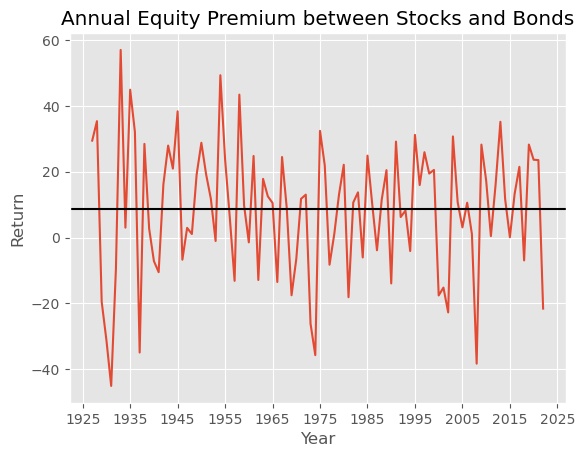

In [20]:
# plot the premium
(datayear["Mkt"]-datayear["RF"]).plot()
plt.xlabel("Year")
plt.ylabel("Return")
plt.title("Annual Equity Premium between Stocks and Bonds")
xtick_positions = np.arange(1925, 2035, 10)
xtick_labels = [str(year) for year in range(1925, 2035, 10)]
plt.xticks(xtick_positions, xtick_labels)
plt.axhline(y=8.55, color='k')
plt.style.use("ggplot")
plt.savefig('premium.png')


# mean equity premium puzzle
(datayear["Mkt"]-datayear["RF"]).mean()
sem = stats.sem(datayear["Mkt"]-datayear["RF"])
print(sem)



In [21]:
#we work on month returns here
# load the data for bonds
datamonth['Date'] = pd.to_datetime(datamonth['Unnamed: 0'], format ='%Y%m')
datamonth.set_index(datamonth['Date'].dt.to_period('M'), inplace=True)
datamonth=datamonth.drop(columns = ["Unnamed: 0","Date"])
datamonth = datamonth.applymap(float)
datamonth["Mkt"] = datamonth['Mkt-RF']+datamonth['RF']
datamonth = datamonth.drop(columns = ["Mkt-RF","SMB","HML"])
datamonth["RF"] = datamonth["RF"]/100
datamonth["Mkt"] = datamonth["Mkt"]/100
datamonth

,RF,Mkt
Date,,
1926-07,0.0022,0.0318
1926-08,0.0025,0.0289
1926-09,0.0023,0.0059
1926-10,0.0032,-0.0292
1926-11,0.0031,0.0284
...,...,...
2022-10,0.0023,0.0806
2022-11,0.0029,0.0489
2022-12,0.0033,-0.0608


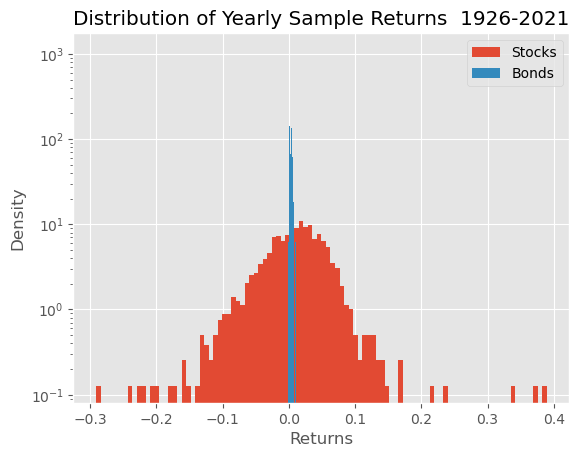

In [220]:
#distribution of returns, for bonds and stocks

plt.hist(datamonth["Mkt"],bins = 100, density = True, label = "Stocks")
plt.hist(datamonth["RF"], bins = 100, density = True, label = "Bonds")

plt.ylabel("Density")
plt.xlabel("Returns")
plt.title("Distribution of Yearly Sample Returns  1926-2021")
plt.yscale("log")
plt.legend()
ax.set_title("Distribution of Monthly Returns  1926-2021")
plt.savefig('distribution.png')

# Display the histogram
plt.show()





In [22]:
#computation of returns up to 18 months for bonds
bonds = datamonth
bonds  = bonds.drop("Mkt",axis = 1)
bonds= bonds.rename(columns={'RF':'RF0'})
lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
for lag in lags:
    bonds[f"RF{lag}"] = bonds["RF0"].shift(-lag)

    
intervals=[1,2,3,4,6,8,10,12,14,16,18]
for interval in range(19):
    bonds[f"R{interval}"] = 1 
    for i in range(interval):
        bonds[f"R{interval}"] *= (1 + bonds[f"RF{i}"])
    bonds[f"R{interval}"] = bonds[f"R{interval}"]-1
    
bonds.dropna(inplace=True)
bonds

,RF0,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,...,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0022,0.0025,0.0023,0.0032,0.0031,0.0028,0.0025,0.0026,0.0030,0.0025,...,0.024461,0.027023,0.030104,0.032782,0.035880,0.038781,0.040962,0.043565,0.045756,0.048057
1926-08,0.0025,0.0023,0.0032,0.0031,0.0028,0.0025,0.0026,0.0030,0.0025,0.0030,...,0.024768,0.027842,0.030515,0.033606,0.036500,0.038677,0.041274,0.043460,0.045756,0.048370
1926-09,0.0023,0.0032,0.0031,0.0028,0.0025,0.0026,0.0030,0.0025,0.0030,0.0026,...,0.025279,0.027945,0.031029,0.033916,0.036087,0.038677,0.040858,0.043148,0.045756,0.049207
1926-10,0.0032,0.0031,0.0028,0.0025,0.0026,0.0030,0.0025,0.0030,0.0026,0.0030,...,0.025586,0.028663,0.031543,0.033709,0.036294,0.038470,0.040754,0.043356,0.046799,0.049835
1926-11,0.0031,0.0028,0.0025,0.0026,0.0030,0.0025,0.0030,0.0026,0.0030,0.0028,...,0.025382,0.028253,0.030412,0.032988,0.035157,0.037435,0.040028,0.043460,0.046486,0.048789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,...,0.000100,0.000100,0.000100,0.000200,0.000300,0.000600,0.001200,0.002001,0.003905,0.005813
2021-05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,...,0.000100,0.000100,0.000200,0.000300,0.000600,0.001200,0.002001,0.003905,0.005813,0.008126
2021-06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0001,...,0.000100,0.000200,0.000300,0.000600,0.001200,0.002001,0.003905,0.005813,0.008126,0.011050


In [23]:
#computation of returns up to 18 months for market
stocks = datamonth
stocks  = stocks.drop("RF",axis = 1)
stocks= stocks.rename(columns={'Mkt':'Mkt0'})
lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
for lag in lags:
    stocks[f"Mkt{lag}"] = stocks["Mkt0"].shift(-lag)

    
intervals=[2,4,6,8,10,12,14,16,18]
for interval in range(19):
    stocks[f"RMkt{interval}"] = 1 
    for i in range(interval):
        stocks[f"RMkt{interval}"] *= (1 + stocks[f"Mkt{i}"])
    stocks[f"RMkt{interval}"] = stocks[f"RMkt{interval}"]-1

stocks.dropna(inplace=True)
stocks


,Mkt0,Mkt1,Mkt2,Mkt3,Mkt4,Mkt5,Mkt6,Mkt7,Mkt8,Mkt9,...,RMkt9,RMkt10,RMkt11,RMkt12,RMkt13,RMkt14,RMkt15,RMkt16,RMkt17,RMkt18
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0318,0.0289,0.0059,-0.0292,0.0284,0.0290,0.0019,0.0444,0.0043,0.0071,...,0.152883,0.161069,0.227714,0.202178,0.293062,0.322156,0.387868,0.331520,0.421930,0.454777
1926-08,0.0289,0.0059,-0.0292,0.0284,0.0290,0.0019,0.0444,0.0043,0.0071,0.0574,...,0.125285,0.189876,0.165127,0.253210,0.281408,0.345094,0.290483,0.378107,0.409941,0.403878
1926-09,0.0059,-0.0292,0.0284,0.0290,0.0019,0.0444,0.0043,0.0071,0.0574,-0.0208,...,0.156455,0.132400,0.218010,0.245415,0.307312,0.254235,0.339398,0.370338,0.364446,0.345753
1926-10,-0.0292,0.0284,0.0290,0.0019,0.0444,0.0043,0.0071,0.0574,-0.0208,0.0756,...,0.125758,0.210866,0.238110,0.299644,0.246879,0.331542,0.362300,0.356443,0.337859,0.459605
1926-11,0.0284,0.0290,0.0019,0.0444,0.0043,0.0071,0.0574,-0.0208,0.0756,0.0225,...,0.247287,0.275351,0.338735,0.284383,0.371592,0.403276,0.397242,0.378100,0.503507,0.570413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,0.0493,0.0029,0.0275,0.0127,0.0291,-0.0437,0.0665,-0.0155,0.0311,-0.0625,...,0.166673,0.093756,0.068709,0.101411,-0.002672,-0.005764,-0.088981,-0.001068,-0.036830,-0.125056
2021-05,0.0029,0.0275,0.0127,0.0291,-0.0437,0.0665,-0.0155,0.0311,-0.0625,-0.0229,...,0.042367,0.018497,0.049663,-0.049530,-0.052477,-0.131784,-0.048002,-0.082083,-0.166164,-0.098957
2021-06,0.0275,0.0127,0.0291,-0.0437,0.0665,-0.0155,0.0311,-0.0625,-0.0229,0.0306,...,0.015552,0.046628,-0.052279,-0.055217,-0.134295,-0.050755,-0.084737,-0.168576,-0.101563,-0.057629


In [24]:
# definition of the value function 

def compute_value(returns, alpha=0.88, beta = 0.88, lam= 2.25, ref=0):
    gain_mask = returns >= ref
    value = np.zeros_like(returns)
    value[gain_mask] = returns[gain_mask]**alpha
    value[~gain_mask] = -lam*((-returns[~gain_mask])**beta)
    return value


# definition of the non linear tranform of the cumulative distribution of the gamble  

def compute_w(p, gamma): 
    p=np.clip(p,0,1)
    return p**gamma/((p**gamma + (1-p)**gamma))**(1/gamma)


# definition of the ranking and the probabilities of the returns

def makesbinsandprobs (data, nbins):
    dfcut = pd.cut(data,bins=nbins, labels= range(nbins))
    dfcut.name = "bins"
    bins = data.reset_index(drop=True).to_frame().join(dfcut.reset_index(drop = True))
    bins_prob = bins.groupby("bins").size()/10000
    bins_mean = bins.groupby("bins").mean().ffill()
    #bins_mean.dropna(inplace=True)
    bins_prob.name="p"
    bins_mean.columns = ["Mean"]
    p_left = bins_prob.cumsum()-bins_prob
    p_left.name="p_left"
    p_right = 1-bins_prob-p_left
    p_right.name="p_right"
    return bins_mean.join(bins_prob).join(p_left).join(p_right)


#definition of the decision weight 

def compute_pi(returns, p,p_left, p_right, gamma_gain= 0.61, gamma_loss = 0.69,ref=0):
    out = np.zeros_like(returns)
    pi = np.zeros_like(returns)
    pi_star = np.zeros_like(returns)
    gain_mask = returns >= ref
    gains = returns[gain_mask]
    losses = returns[~gain_mask] 
    pi[gain_mask] = p[gain_mask]+p_right[gain_mask]
    pi_star[gain_mask] =p_right[gain_mask]
    pi[~gain_mask] = p_left[~gain_mask]+p[~gain_mask]
    pi_star[~gain_mask] =p_left[~gain_mask]
    out[gain_mask] = compute_w(pi[gain_mask],gamma_gain)-compute_w(pi_star[gain_mask],gamma_gain)
    out[~gain_mask] = compute_w(pi[~gain_mask],gamma_loss)-compute_w(pi_star[~gain_mask],gamma_loss)
    return out


# prospect utility of the gamble
def compute_vg(data, nbins = 21, gamma_gain= 0.61, gamma_loss = 0.69,ref=0, alpha=0.88, beta = 0.88, lam= 2.25):
    binsandprobs = makesbinsandprobs(data,nbins)
    pi = compute_pi(*binsandprobs.values.T, gamma_gain, gamma_loss,ref)
    vx =  compute_value(binsandprobs.Mean, alpha,beta,lam,ref)
    return (vx*pi).sum()


    

## Evaluation Period Simulation

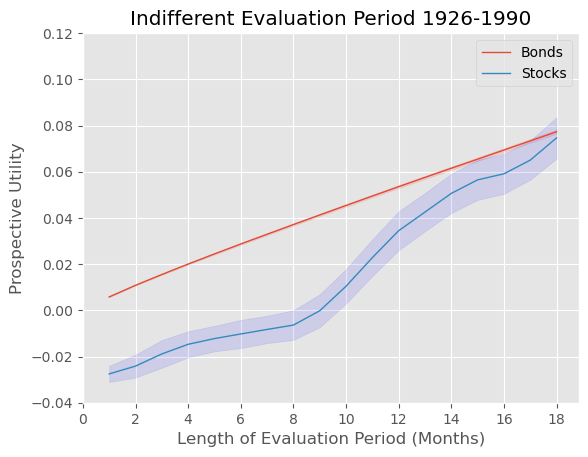

In [212]:
#Evaluation Period 1926-1990

#Bonds
returns_bond = bonds[["R1","R2","R3","R4","R5","R6","R7","R8","R9","R10","R11","R12","R13","R14","R15","R16","R17","R18"]]

#Stocks
returns_stocks = stocks[["RMkt1","RMkt2","RMkt3","RMkt4","RMkt5","RMkt6","RMkt7","RMkt8","RMkt9","RMkt10","RMkt11","RMkt12","RMkt13","RMkt14","RMkt15","RMkt16","RMkt17","RMkt18"]]

fig,ax = plt.subplots()

prospect_bonds = pd.DataFrame()
prospect_stocks = pd.DataFrame()
for i in range(100):
    returns_bond_sample = returns_bond.loc[:"1990-12"].sample(10_000, replace=True)
    prospect_bonds[f"{i}"] = returns_bond_sample.apply(compute_vg).to_frame()
    returns_stocks_sample = returns_stocks.loc[:"1990-12"].sample(10_000, replace=True)
    prospect_stocks[f"{i}"] = returns_stocks_sample.apply(compute_vg).to_frame()

prospect_bonds_mean = prospect_bonds.mean(axis=1)
prospect_bonds_deviation = 1.96*prospect_bonds.std(axis=1)

under_line     = (prospect_bonds_mean-prospect_bonds_deviation)
over_line      = (prospect_bonds_mean+prospect_bonds_deviation)

prospect_stocks_mean = prospect_stocks.mean(axis=1)
prospect_stocks_deviation = 1.96*prospect_stocks.std(axis=1)

under_line1     = (prospect_stocks_mean-prospect_stocks_deviation)
over_line1      = (prospect_stocks_mean+prospect_stocks_deviation)

new_index = pd.Series(range(1,19))
prospect_bonds_mean.index = new_index
prospect_stocks_mean.index = new_index

plt.plot(prospect_bonds_mean, linewidth=1, label = "Bonds") #mean curve.
plt.fill_between(prospect_bonds_mean.index, under_line, over_line, color='r', alpha=.1) #std curves.

plt.plot(prospect_stocks_mean, linewidth=1, label = "Stocks") #mean curve.
plt.fill_between(prospect_bonds_mean.index, under_line1, over_line1, color='b', alpha=.1) #std curves.

ax.set_xticks(np.arange(0, 19, 2))
ax.set_yticks(np.arange(-0.04, 0.13, 0.02))
ax.set_ylabel("Prospective Utility")
ax.set_xlabel("Length of Evaluation Period (Months)")
ax.set_title("Indifferent Evaluation Period 1926-1990")
plt.style.use("ggplot")
plt.legend()

plt.savefig('1926-1990.png')

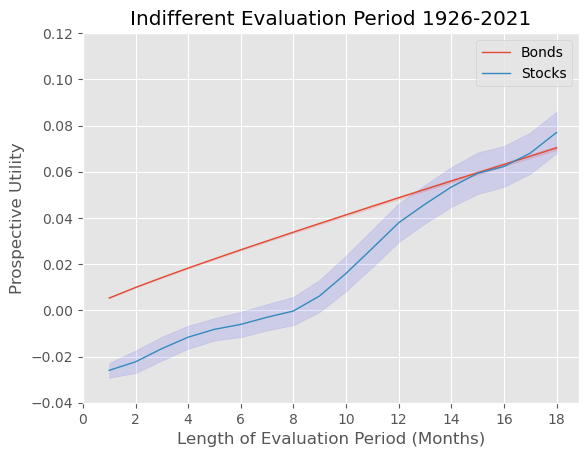

In [213]:
#Evaluation Period 1926-2021

fig,ax = plt.subplots()

prospect_bonds = pd.DataFrame()
prospect_stocks = pd.DataFrame()
for i in range(100):
    returns_bond_sample = returns_bond.sample(10_000, replace=True)
    prospect_bonds[f"{i}"] = returns_bond_sample.apply(compute_vg).to_frame()
    returns_stocks_sample = returns_stocks.sample(10_000, replace=True)
    prospect_stocks[f"{i}"] = returns_stocks_sample.apply(compute_vg).to_frame()

prospect_bonds_mean = prospect_bonds.mean(axis=1)
prospect_bonds_deviation = 1.96*prospect_bonds.std(axis=1)

under_line     = (prospect_bonds_mean-prospect_bonds_deviation)
over_line      = (prospect_bonds_mean+prospect_bonds_deviation)

prospect_stocks_mean = prospect_stocks.mean(axis=1)
prospect_stocks_deviation = 1.96*prospect_stocks.std(axis=1)

under_line1     = (prospect_stocks_mean-prospect_stocks_deviation)
over_line1      = (prospect_stocks_mean+prospect_stocks_deviation)

new_index = pd.Series(range(1,19))
prospect_bonds_mean.index = new_index
prospect_stocks_mean.index = new_index

plt.plot(prospect_bonds_mean, linewidth=1, label = "Bonds") #mean curve.
plt.fill_between(prospect_bonds_mean.index, under_line, over_line, color='r', alpha=.1) #std curves.

plt.plot(prospect_stocks_mean, linewidth=1, label = "Stocks") #mean curve.
plt.fill_between(prospect_bonds_mean.index, under_line1, over_line1, color='b', alpha=.1) #std curves.

ax.set_xticks(np.arange(0, 19, 2))
ax.set_yticks(np.arange(-0.04, 0.13, 0.02))
ax.set_ylabel("Prospective Utility")
ax.set_xlabel("Length of Evaluation Period (Months)")
ax.set_title("Indifferent Evaluation Period 1926-2021")
plt.style.use("ggplot")
plt.legend()

plt.savefig('1926-2021.png')


## Optimal Portfolio Simulation 

In [182]:
#new time series with 18 months returns of bonds and stocks (as in the paper)

#portfolio construction
portfolio = pd.concat([bonds["R18"].loc[:"1990-12"],stocks["RMkt18"].loc[:"1990-12"]], axis = 1)

for i in range(11):
    p = i/10.0
    portfolio[f"ST{i}"] = p*portfolio["RMkt18"] + (1-p)*portfolio["R18"]

portfolio = portfolio.drop(columns = ["R18","RMkt18"])
portfolio

,ST0,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,ST9,ST10
Date,,,,,,,,,,,
1926-07,0.048057,0.088729,0.129401,0.170073,0.210745,0.251417,0.292089,0.332761,0.373433,0.414105,0.454777
1926-08,0.048370,0.083921,0.119472,0.155023,0.190573,0.226124,0.261675,0.297226,0.332777,0.368327,0.403878
1926-09,0.049207,0.078862,0.108516,0.138171,0.167825,0.197480,0.227134,0.256789,0.286444,0.316098,0.345753
1926-10,0.049835,0.090812,0.131789,0.172766,0.213743,0.254720,0.295697,0.336674,0.377651,0.418628,0.459605
1926-11,0.048789,0.100951,0.153114,0.205276,0.257438,0.309601,0.361763,0.413926,0.466088,0.518251,0.570413
...,...,...,...,...,...,...,...,...,...,...,...
1990-08,0.092941,0.108772,0.124603,0.140434,0.156265,0.172096,0.187927,0.203758,0.219589,0.235420,0.251252
1990-09,0.088815,0.120072,0.151329,0.182586,0.213843,0.245100,0.276357,0.307614,0.338871,0.370128,0.401385
1990-10,0.086001,0.122286,0.158571,0.194856,0.231141,0.267425,0.303710,0.339995,0.376280,0.412565,0.448849


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


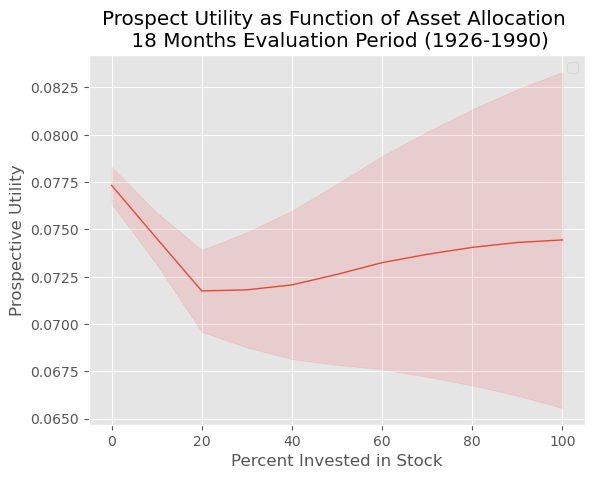

In [227]:
#portfolio evaluation 1926-1990

fig,ax = plt.subplots()

prospect_portfolio = pd.DataFrame()

for i in range(100):
    returns_portfolio_sample = portfolio.sample(10_000, replace=True)
    prospect_portfolio[f"{i}"]= returns_portfolio_sample.apply(compute_vg).to_frame()

    
prospect_portfolio_mean = prospect_portfolio.mean(axis=1)
prospect_portfolio_deviation = 1.96*prospect_portfolio.std(axis=1)

under_line1     = (prospect_portfolio_mean-prospect_portfolio_deviation)
over_line1      = (prospect_portfolio_mean+prospect_portfolio_deviation)

new_index = pd.Series(range(0,110,10))
prospect_portfolio_mean.index = new_index

plt.plot(prospect_portfolio_mean, linewidth=1) #mean curve.
plt.fill_between(prospect_portfolio_mean.index, under_line1, over_line1, color='r', alpha=.1) #std curves.

ax.set_xticks(np.arange(0, 120, 20))
#ax.set_yticks(np.arange(-0.04, 0.13, 0.02))
ax.set_ylabel("Prospective Utility")
ax.set_xlabel("Percent Invested in Stock")
ax.set_title("Prospect Utility as Function of Asset Allocation \n 18 Months Evaluation Period (1926-1990)")
plt.style.use("ggplot")
plt.legend()

plt.savefig('portfolio_1926-1990.png')

In [189]:
print(prospect_portfolio)
print(prospect_portfolio_mean)
print(prospect_portfolio_deviation)

             0         1         2         3         4         5         6  \
ST0   0.078538  0.077187  0.077462  0.076923  0.078042  0.076452  0.077756   
ST1   0.074642  0.074904  0.074161  0.073284  0.074261  0.072986  0.074146   
ST2   0.070818  0.072722  0.070715  0.069370  0.070359  0.069771  0.070897   
ST3   0.069625  0.073292  0.070088  0.068440  0.069528  0.069506  0.070831   
ST4   0.068730  0.073891  0.069755  0.067885  0.069111  0.069433  0.071127   
ST5   0.068084  0.074787  0.069760  0.067730  0.069094  0.069630  0.071726   
ST6   0.067560  0.075772  0.069864  0.067652  0.069096  0.069853  0.072326   
ST7   0.066880  0.076548  0.069775  0.067525  0.068940  0.069898  0.072757   
ST8   0.066166  0.077241  0.069640  0.067307  0.068660  0.069905  0.073104   
ST9   0.065376  0.077878  0.069410  0.067017  0.068279  0.069811  0.073366   
ST10  0.064460  0.078364  0.069083  0.066604  0.067783  0.069611  0.073477   

             7         8         9  ...        90        91    

In [85]:
#new time series with 15 months returns of bonds and stocks (as in the paper)
#portfolio construction

portfolio = pd.concat([bonds["R15"],stocks["RMkt15"]], axis = 1)

for i in range(11):
    p = i/10.0
    portfolio[f"ST{i}"] = p*portfolio["RMkt15"] + (1-p)*portfolio["R15"]

portfolio = portfolio.drop(columns = ["R15","RMkt15"])
portfolio

,ST0,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,ST9,ST10
Date,,,,,,,,,,,
1926-07,0.032782,0.049721,0.066661,0.083601,0.100540,0.117480,0.134419,0.151359,0.168299,0.185238,0.202178
1926-08,0.033606,0.055567,0.077527,0.099488,0.121448,0.143408,0.165369,0.187329,0.209290,0.231250,0.253210
1926-09,0.033916,0.055066,0.076216,0.097365,0.118515,0.139665,0.160815,0.181965,0.203115,0.224265,0.245415
1926-10,0.033709,0.060303,0.086896,0.113490,0.140083,0.166677,0.193270,0.219864,0.246457,0.273051,0.299644
1926-11,0.032988,0.058127,0.083267,0.108406,0.133546,0.158685,0.183825,0.208964,0.234104,0.259243,0.284383
...,...,...,...,...,...,...,...,...,...,...,...
2021-04,0.000200,0.010321,0.020442,0.030563,0.040684,0.050806,0.060927,0.071048,0.081169,0.091290,0.101411
2021-05,0.000300,-0.004683,-0.009666,-0.014649,-0.019632,-0.024615,-0.029598,-0.034581,-0.039564,-0.044547,-0.049530
2021-06,0.000600,-0.004982,-0.010563,-0.016145,-0.021727,-0.027308,-0.032890,-0.038472,-0.044053,-0.049635,-0.055217


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


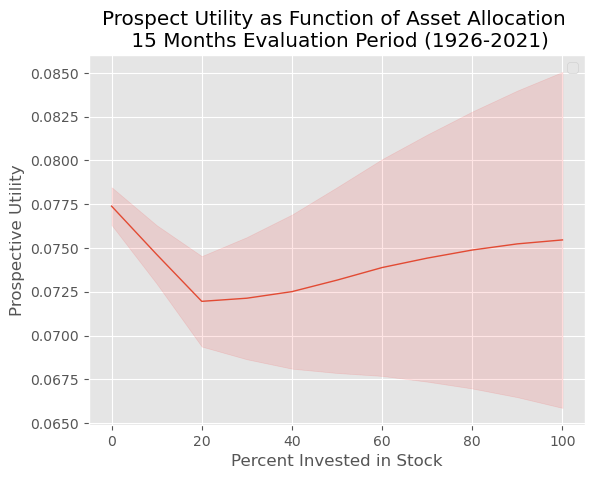

In [225]:
#portfolio evaluation 1926-2021

fig,ax = plt.subplots()

prospect_portfolio = pd.DataFrame()

for i in range(100):
    returns_portfolio_sample = portfolio.sample(10_000, replace=True)
    prospect_portfolio[f"{i}"]= returns_portfolio_sample.apply(compute_vg).to_frame()

    
prospect_portfolio_mean = prospect_portfolio.mean(axis=1)
prospect_portfolio_deviation = 1.96*prospect_portfolio.std(axis=1)

under_line1     = (prospect_portfolio_mean-prospect_portfolio_deviation)
over_line1      = (prospect_portfolio_mean+prospect_portfolio_deviation)

new_index = pd.Series(range(0,110,10))
prospect_portfolio_mean.index = new_index

plt.plot(prospect_portfolio_mean, linewidth=1) #mean curve.
plt.fill_between(prospect_portfolio_mean.index, under_line1, over_line1, color='r', alpha=.1) #std curves.

ax.set_xticks(np.arange(0, 120, 20))
#ax.set_yticks(np.arange(-0.04, 0.13, 0.02))
ax.set_ylabel("Prospective Utility")
ax.set_xlabel("Percent Invested in Stock")
ax.set_title("Prospect Utility as Function of Asset Allocation \n 15 Months Evaluation Period (1926-2021)")
plt.style.use("ggplot")
plt.legend()

plt.savefig('portfolio_1926-2021.png')